In [1]:
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt
def open_image():
    val = input("Enter your image path: ")  
    image = Image.open(val)
    imageArray = np.array(image)#return an array of the image
    return imageArray

In [5]:
def imageSharpening():
    camManImage = open_image()
    convolved_camManImage = np.zeros((camManImage.shape[0],camManImage.shape[1]))
    for i in range (1,len(camManImage)-1):
        for j in range (1,len(camManImage)-1):
            sum = 0
            sum += (camManImage[i][j]*8)
            sum += (camManImage[i-1][j]*-1)
            sum += (camManImage[i][j-1]*-1)
            sum += (camManImage[i-1][j-1]*-1)
            sum += (camManImage[i-1][j+1]*-1)
            sum += (camManImage[i+1][j-1]*-1)
            sum += (camManImage[i+1][j]*-1)
            sum += (camManImage[i][j+1]*-1)
            sum += (camManImage[i+1][j+1]*-1)
            convolved_camManImage[i][j]=abs(sum)
    factor = 50/max(convolved_camManImage.ravel()) #make the convolved matrix range from 0-50 through the factor
    for i in range (0,len(camManImage)):
        for j in range (0,len(camManImage)):
            convolved_camManImage[i][j]=(convolved_camManImage[i][j]*factor)+camManImage[i][j]  #multiply the convolved matrix by a factor then add it to the original image
            if(convolved_camManImage[i][j]>255): #make the values range from 0-255
                convolved_camManImage[i][j]=255
    print(max(convolved_camManImage.ravel()))
    print(min(convolved_camManImage.ravel()))
    plt.imshow(convolved_camManImage,cmap="gray")
    plt.imsave("Sharpened.jpg",convolved_camManImage,cmap="gray")       

Enter your image path: Cameraman.tif
255.0
7.201612903225806


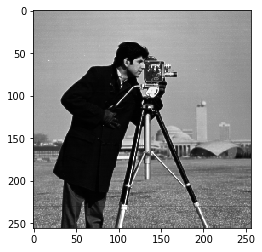

In [6]:
 imageSharpening()